# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


# Importing Training Data set

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')
df = dataset.iloc[:,1:2].values

# Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))

In [4]:
df = mms.fit_transform(df)

In [5]:
df[1:5]

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

# Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(df[i-60:i,0])
    y_train.append(df[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)    
    

In [7]:
x_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Building the RNN

## Importing the keras libraries 

In [8]:
rnn = keras.models.Sequential()

### Building LSTM 1st Layer

In [9]:
rnn.add(keras.layers.LSTM(units= 50,return_sequences= True,input_shape =(X_train.shape[1],1)))

In [10]:
rnn.add(keras.layers.Dropout(0.2))

### Building LSTM 2nd Layer

In [11]:
rnn.add(keras.layers.LSTM(units= 50,return_sequences= True))
rnn.add(keras.layers.Dropout(0.2))

### Building LSTM 3rd Layer

In [12]:
rnn.add(keras.layers.LSTM(units=50,return_sequences= True))
rnn.add(keras.layers.Dropout(0.2))

### Building LSTM 4th Layer

In [13]:
rnn.add(keras.layers.LSTM(units=50))
rnn.add(keras.layers.Dropout(0.2))

### Building Output Layer

In [14]:
rnn.add(keras.layers.Dense(units=1))

### Compiling RNN

In [15]:
rnn.compile(optimizer='adam',loss= 'mean_squared_error')

### Fitting RNN

In [16]:
rnn.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0423
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0051A: 1s - loss: 
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 9

Epoch 97/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0012
Epoch 99/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014


## Importing Test set

In [17]:
ts = pd.read_csv("Google_Stock_Price_Test.csv")

In [18]:
dft = ts.iloc[:,1:2].values

In [19]:
total = np.concatenate((df,dft),0)

In [20]:
x_test = total[len(total) - len(dft) -60:]

In [21]:
x_test = mms.transform(x_test)

### Time Steps

In [22]:
X_test=[]
for i in range(60,80):
    X_test.append(x_test[i-60:i,0])
X_test = np.array(X_test)    

In [23]:
X_test 

array([[-0.5175052 , -0.51750291, -0.51750966, ..., -0.51745433,
        -0.51749021, -0.51749222],
       [-0.51750291, -0.51750966, -0.51747869, ..., -0.51749021,
        -0.51749222,  0.92955205],
       [-0.51750966, -0.51747869, -0.51748873, ..., -0.51749222,
         0.92955205,  0.94731751],
       ...,
       [-0.5174482 , -0.51749174, -0.51750797, ...,  1.01045465,
         1.02407173,  1.03930724],
       [-0.51749174, -0.51750797, -0.51754586, ...,  1.02407173,
         1.03930724,  1.03354044],
       [-0.51750797, -0.51754586, -0.51760327, ...,  1.03930724,
         1.03354044,  0.99624228]])

In [24]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [25]:
X_test

array([[[-0.5175052 ],
        [-0.51750291],
        [-0.51750966],
        ...,
        [-0.51745433],
        [-0.51749021],
        [-0.51749222]],

       [[-0.51750291],
        [-0.51750966],
        [-0.51747869],
        ...,
        [-0.51749021],
        [-0.51749222],
        [ 0.92955205]],

       [[-0.51750966],
        [-0.51747869],
        [-0.51748873],
        ...,
        [-0.51749222],
        [ 0.92955205],
        [ 0.94731751]],

       ...,

       [[-0.5174482 ],
        [-0.51749174],
        [-0.51750797],
        ...,
        [ 1.01045465],
        [ 1.02407173],
        [ 1.03930724]],

       [[-0.51749174],
        [-0.51750797],
        [-0.51754586],
        ...,
        [ 1.02407173],
        [ 1.03930724],
        [ 1.03354044]],

       [[-0.51750797],
        [-0.51754586],
        [-0.51760327],
        ...,
        [ 1.03930724],
        [ 1.03354044],
        [ 0.99624228]]])

In [26]:
X_pred = rnn.predict(X_test)

In [27]:
X_pred = mms.inverse_transform(X_pred)

## Visualization

#### Here we can see the predicted stock price and real stock price is almost similar after 2.5 days.This is a good prediction of stock prices,

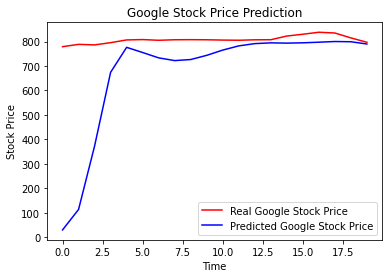

In [28]:
plt.plot(dft,color='red',label = 'Real Google Stock Price')
plt.plot(X_pred,color='blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [29]:
print(np.concatenate((dft.reshape(len(dft),1),X_pred.reshape(len(X_pred),1)),1))

[[778.81        30.46205139]
 [788.36       114.02074432]
 [786.08       373.05187988]
 [795.26       674.09423828]
 [806.4        776.16833496]
 [807.86       755.00653076]
 [805.         733.18103027]
 [807.14       722.00396729]
 [807.48       726.35253906]
 [807.08       743.44812012]
 [805.81       764.91241455]
 [805.12       782.06884766]
 [806.91       791.36810303]
 [807.25       794.44903564]
 [822.3        793.3493042 ]
 [829.62       794.60693359]
 [837.81       797.13189697]
 [834.71       799.9105835 ]
 [814.66       799.01531982]
 [796.86       789.73144531]]


In [30]:
from sklearn.metrics import r2_score
r2_score(dft[15:],X_pred[15:])

-2.8057495757295046